## Import the necessary libraries 

In [1]:
# Import libraries. begin, let's import the necessary libraries that we'll be using throughout this notebook:

# Data Manipulation Libraries
import numpy as np 
import pandas as pd 

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Load the dataset

In [4]:
# Load tha data.
df = pd.read_csv("Invistico_Airline.csv")
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


### preparation the train data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [9]:
# Seeing the shape of the data.
df.shape

(129880, 23)

In [10]:
# Seeing if there are duplicated.
df.duplicated().sum()

0

In [11]:
# seeing if there are null values.
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [12]:
categorical_features = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort',
                       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                       'Inflight wifi service', 'Inflight entertainment', 'Online support',
                       'Ease of Online booking', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

for i in categorical_features:
    print(df[i].value_counts())
    print('-' * 50)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64
--------------------------------------------------
Gender
Female    65899
Male      63981
Name: count, dtype: int64
--------------------------------------------------
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
--------------------------------------------------
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64
--------------------------------------------------
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64
--------------------------------------------------
Seat comfort
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: count, dtype: int64
--------------------------------------------------
Departure/Arrival time convenient
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: count, dtype: int64
------------------------------------------

In [13]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {
    'Seat comfort': {0: 1},
    'Departure/Arrival time convenient': {0: 1},
    'Food and drink': {0: 1},
    'Gate location': {0: 1},
    'Inflight wifi service': {0: 1},
    'Inflight entertainment': {0: 1},
    'Online support': {0: 1},
    'Ease of Online booking': {0: 1},
    'On-board service': {0: 1},
    'Leg room service': {0: 1},
    'Baggage handling': {0: 1},
    'Checkin service': {0: 1},
    'Cleanliness': {0: 1},
    'Online boarding': {0: 1}
}
# Update the specified columns with the new cluster labels using applymap
for col, mapping in cluster_mapping.items():
    df[col] = df[col].apply(lambda x: mapping.get(x, x))


In [14]:
# Check if the rating features have a rate from 1 to 5 was done correctly
for i in ['Gate location', 'Inflight wifi service', 'Online support', 'Ease of Online booking', 
          'On-board service', 'Leg room service', 'Checkin service', 'Cleanliness', 'Online boarding']:
    print(df[i].value_counts())
    print('-' * 50)

Gate location
3    33546
4    30088
2    24518
1    22567
5    19161
Name: count, dtype: int64
--------------------------------------------------
Inflight wifi service
4    31560
5    28830
3    27602
2    27045
1    14843
Name: count, dtype: int64
--------------------------------------------------
Online support
4    41510
5    35563
3    21609
2    17260
1    13938
Name: count, dtype: int64
--------------------------------------------------
Ease of Online booking
4    39920
5    34137
3    22418
2    19951
1    13454
Name: count, dtype: int64
--------------------------------------------------
On-board service
4    40675
5    31724
3    27037
2    17174
1    13270
Name: count, dtype: int64
--------------------------------------------------
Leg room service
4    39698
5    34385
3    22467
2    21745
1    11585
Name: count, dtype: int64
--------------------------------------------------
Checkin service
4    36481
3    35538
5    27005
2    15486
1    15370
Name: count, dtype: int64
---

Following the refinement of the rating features, our next step is to investigate the correlations among the numerical data variables.

In [15]:
# Numerical columns
numerical_features = ["Age", "Flight Distance", "Departure Delay in Minutes", 'Arrival Delay in Minutes']

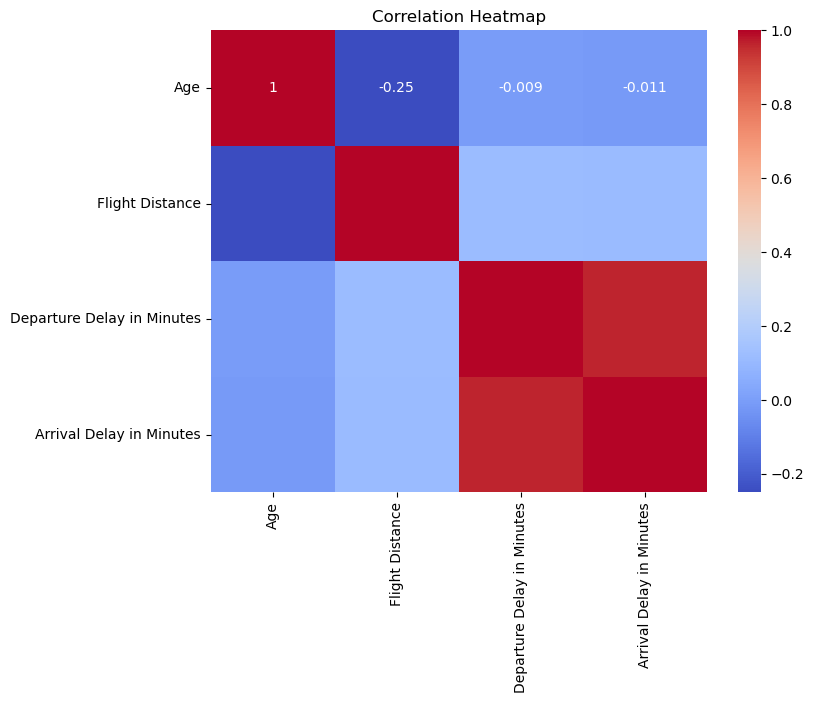

In [16]:
plt.figure(figsize=(8, 6))

# Calculate the correlation matrix for the numerical columns
correlation_matrix = df[numerical_features].corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

It is evident that there is an extremely strong correlation of 0.97 between "Departure Delay in Minutes" and 'Arrival Delay in Minutes'. This high correlation suggests that these two variables essentially represent the same information, and therefore, it is advisable to eliminate one of them. Given that 'Arrival Delay in Minutes' also contains missing values, we have decided to proceed with the removal of this variable. This simplification will streamline our analysis while retaining the essential information.

In [17]:
# Drop the 'Arrival Delay in Minutes' column from the dataframe
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)

## Data Visualiation and Analysis

In [18]:
# List of rating features to be considered for analysis
rating_features = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
                   'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
                   'Online boarding']


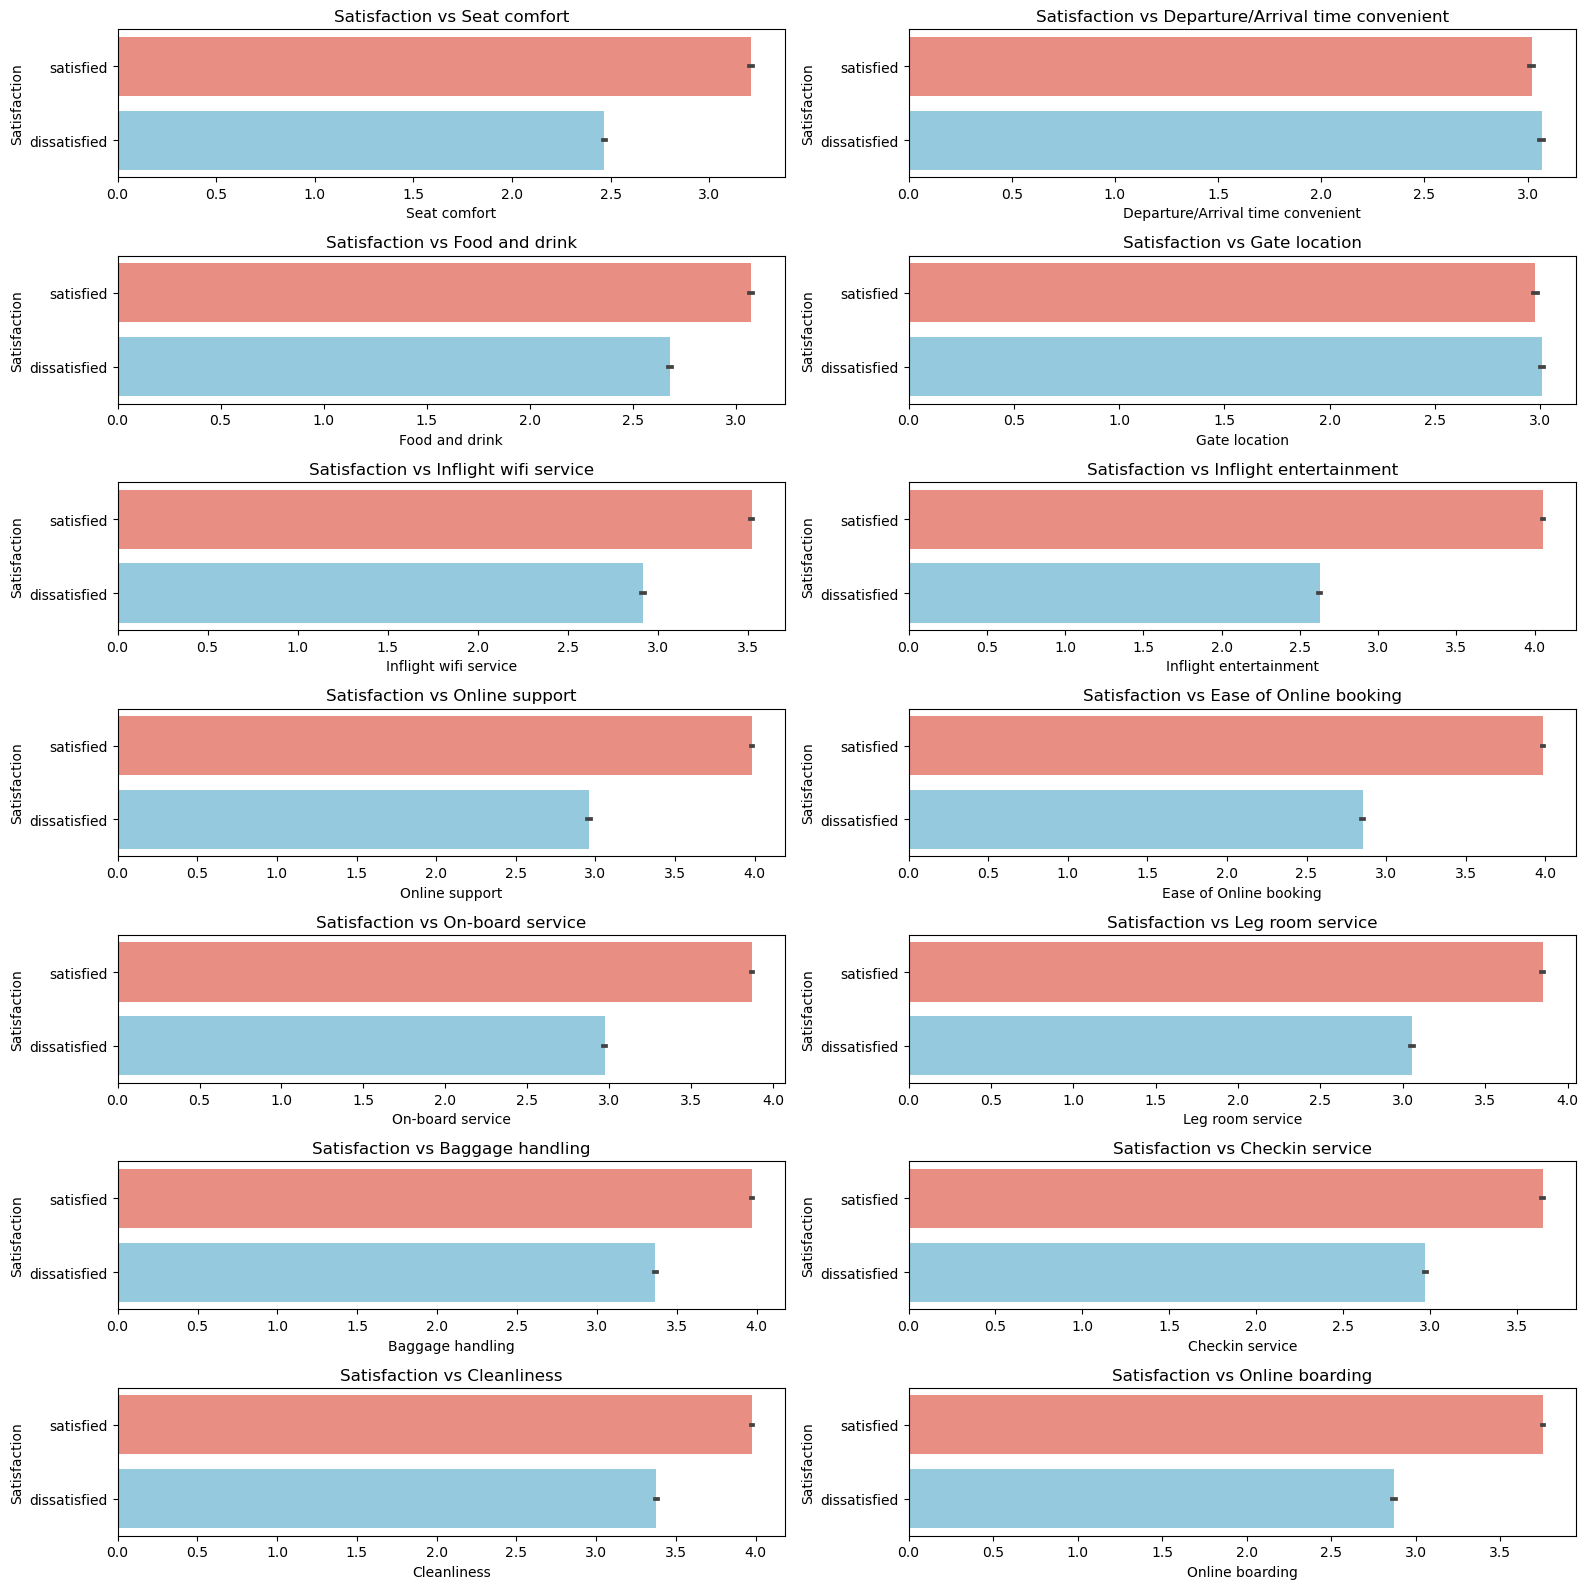

In [19]:
# Set up subplots with 7 rows and 2 columns
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 16))

# Iterate through the rating features and create bar plots
for i, feature in enumerate(rating_features):
    row, col = divmod(i, 2)
    sns.barplot(x=feature, y='satisfaction', data=df, ax=axes[row, col], palette=['salmon', 'skyblue'])
    
    # Setting titles, x-axis labels, and y-axis labels for each subplot
    axes[row, col].set_title(f'Satisfaction vs {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Satisfaction')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

In these graphs, our objective is to discern whether ratings have a direct impact on customer satisfaction or, in other words, to identify the most influential features affecting customer satisfaction. Our analysis reveals that "Departure/Arrival time convenient" and "Gate location" appear to have almost no effect on customer satisfaction. The ratio of satisfied to dissatisfied customers is nearly equal for these two features.

Interestingly, we observe that "Inflight entertainment" plays a pivotal role in customer satisfaction, with a substantial difference between the satisfaction levels of those who are satisfied and dissatisfied. Consequently, it can be considered the most influential feature. Additionally, "Seat comfort," "Online support," "Ease of Online booking," "On-board service,", "Leg room service" and "Online boarding" closely follow "Inflight entertainment" in terms of importance.

However, other features, while still contributing to customer satisfaction, exhibit a comparatively weaker influence.

This analysis assists in prioritizing which aspects of the airline's service may require particular attention for enhancing overall customer satisfaction.



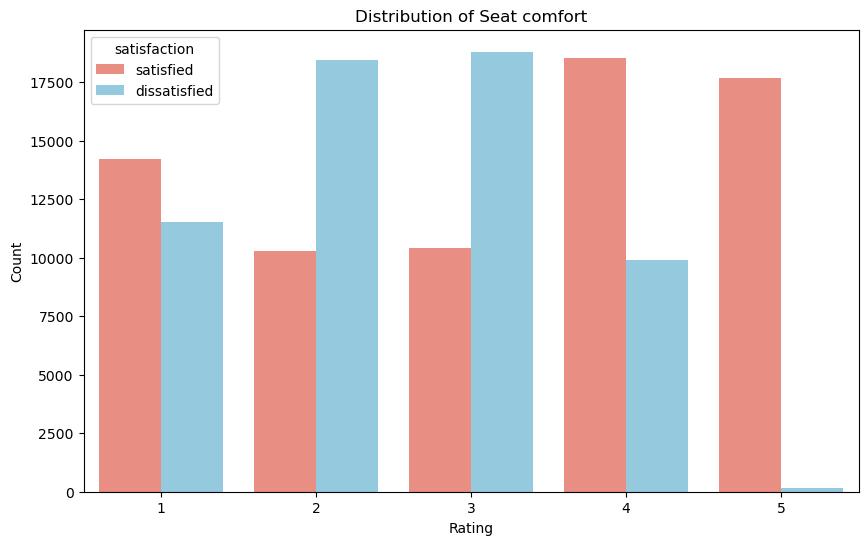

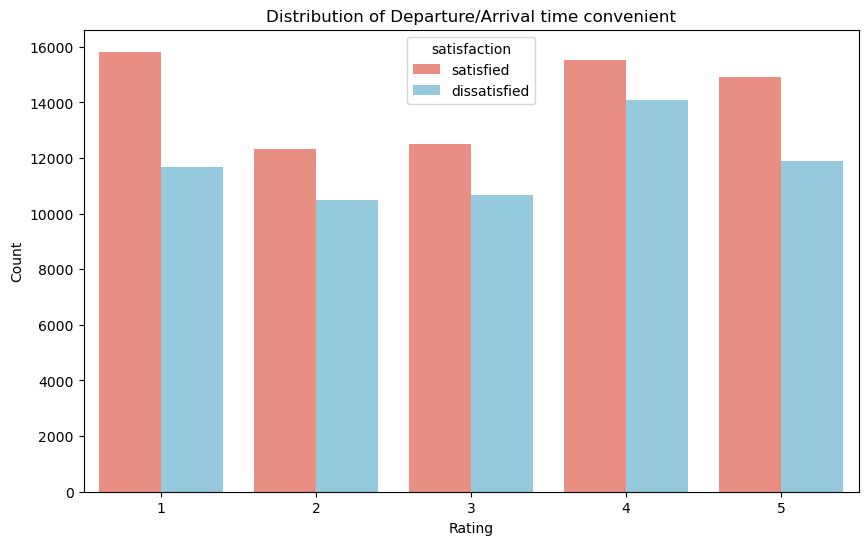

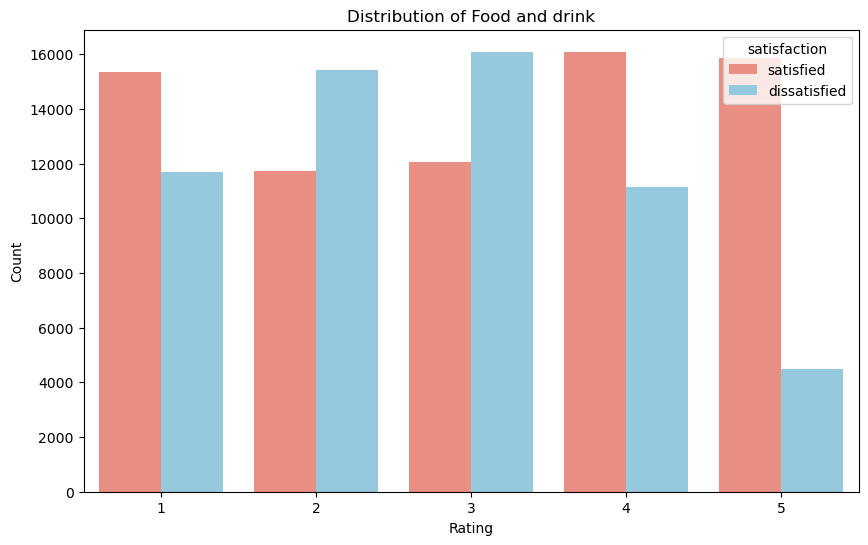

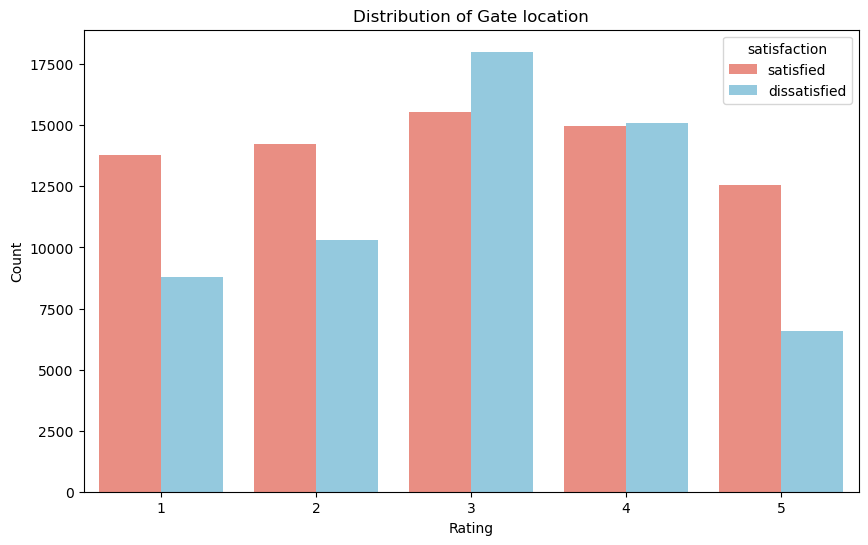

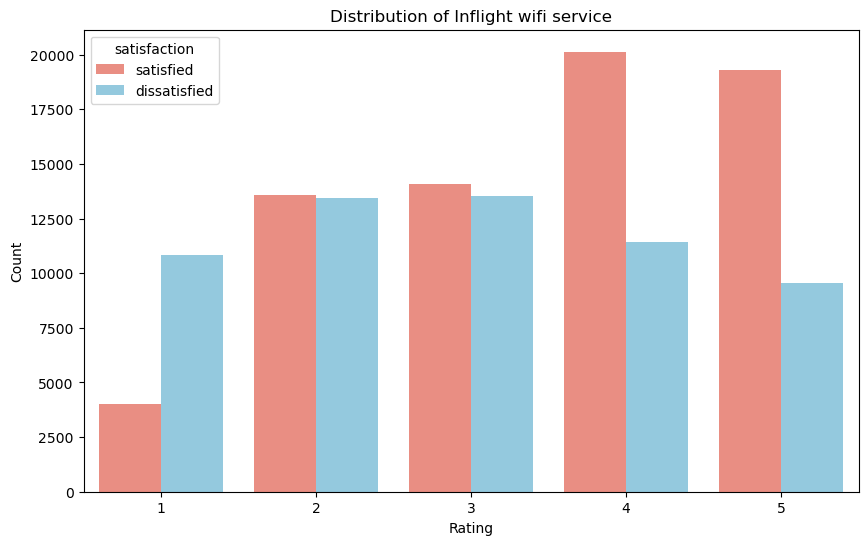

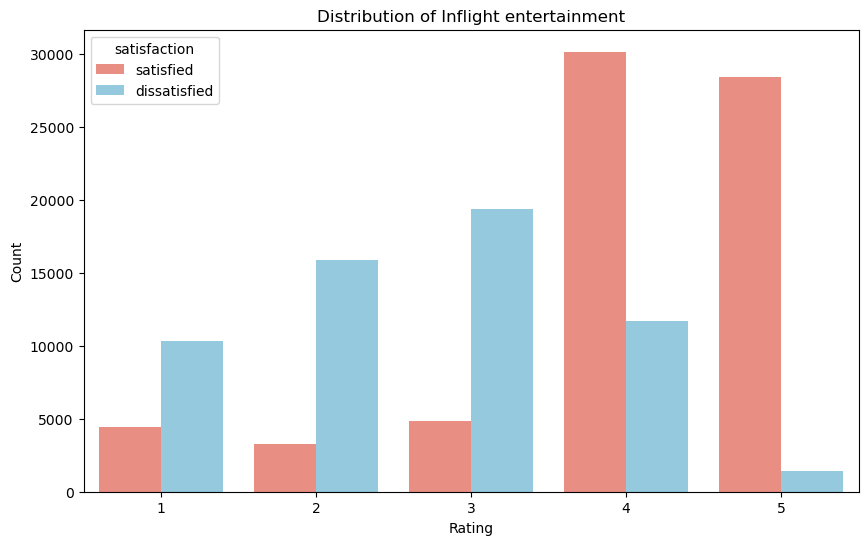

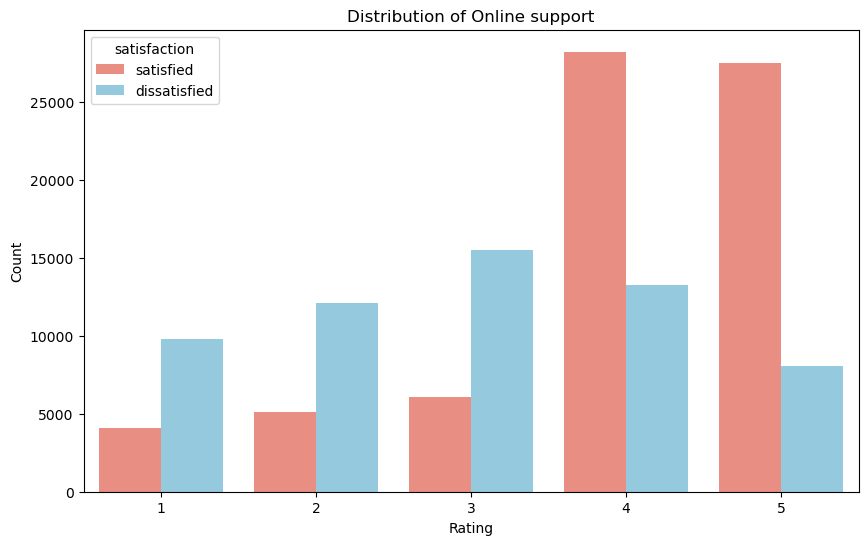

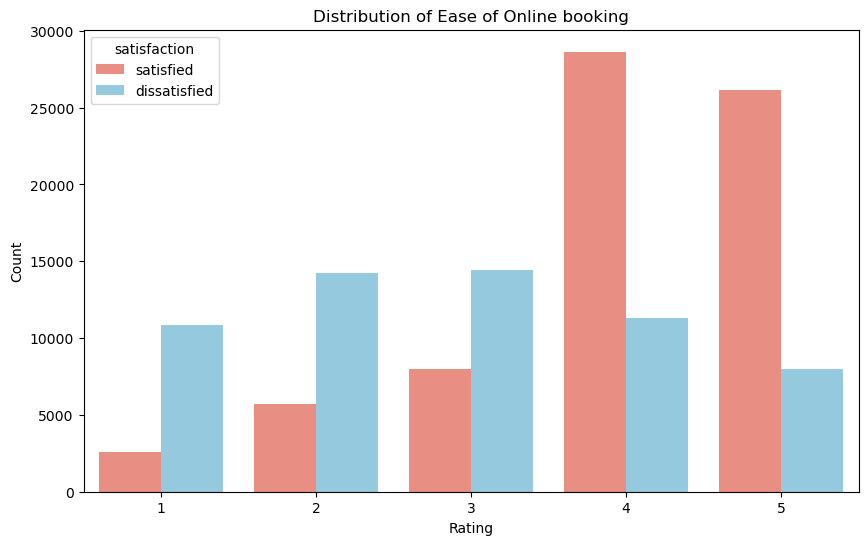

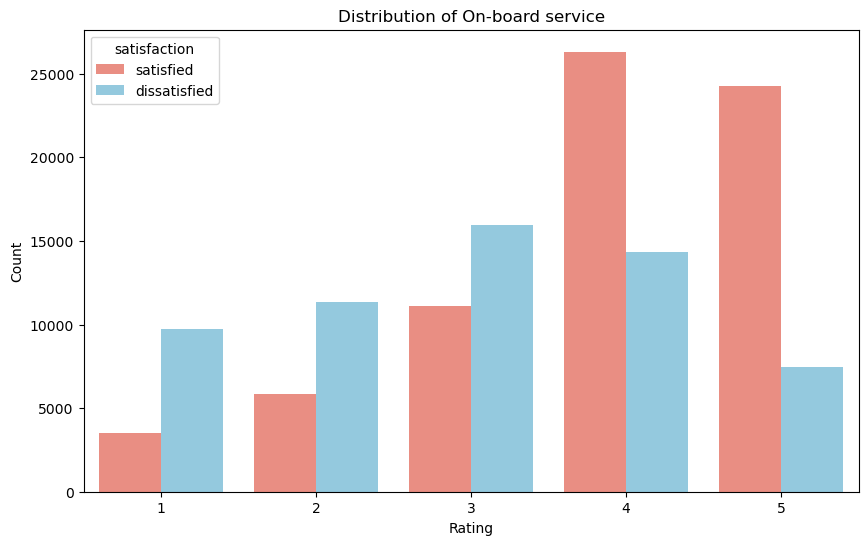

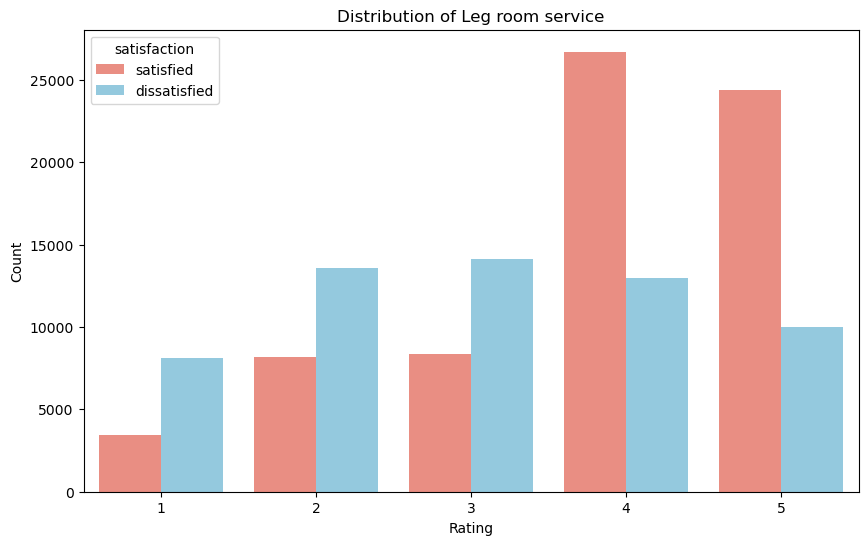

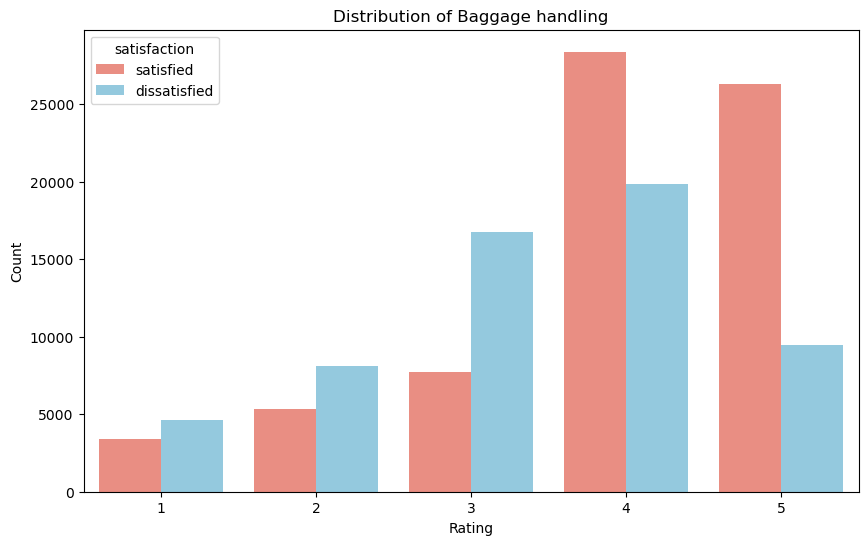

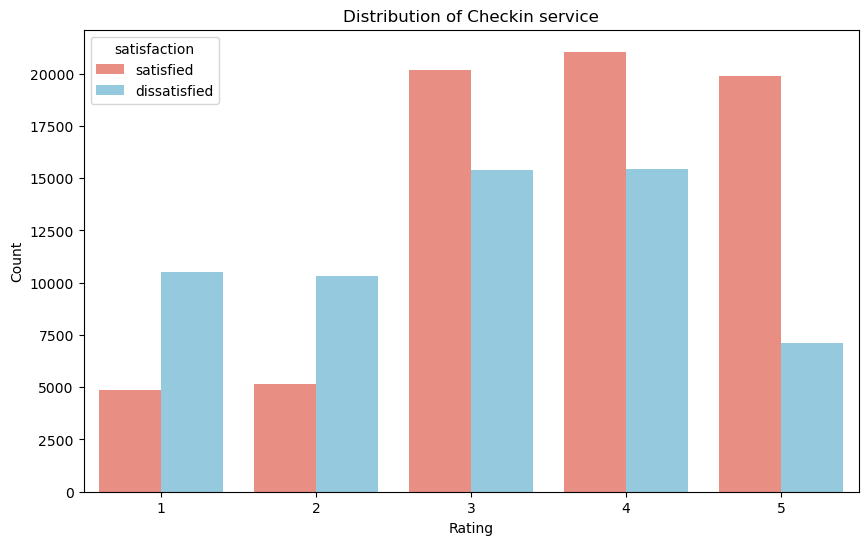

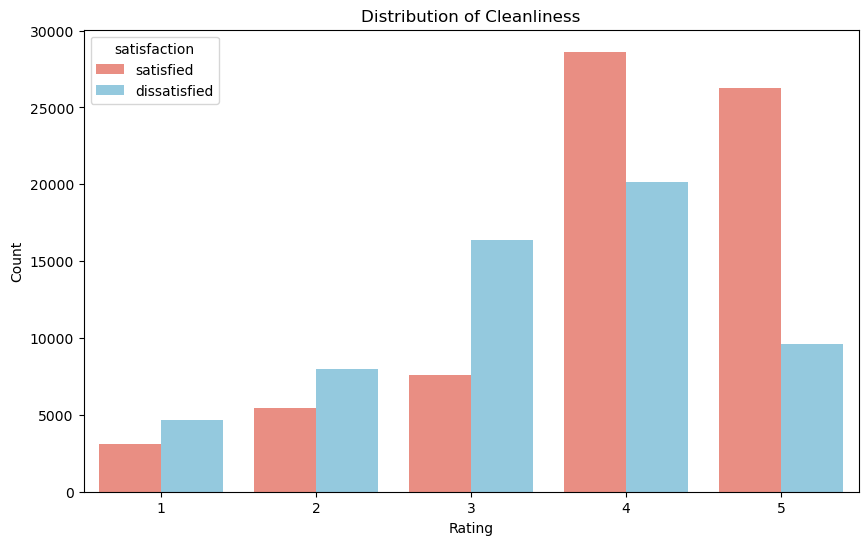

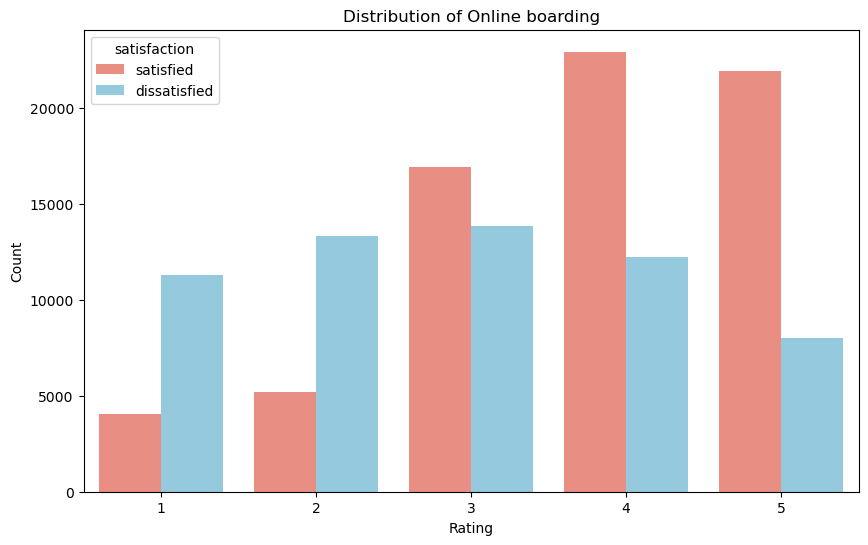

In [20]:
# Iterate through each rating column
for col in rating_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='satisfaction', palette=['salmon', 'skyblue'])
    
    # Setting the title, labels, and rotation for the x-axis ticks on a plot
    plt.title('Distribution of {}'.format(col))
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    # Display the plot
    plt.show()

In these visualizations, we delve deeper into understanding customer satisfaction in relation to their provided ratings. Notably, for 'Inflight entertainment,' we observe that the majority of customers who give ratings of 4 and 5 are highly satisfied. Remarkably, those who give a rating of 5 are almost exclusively satisfied, indicating an absence of dissatisfied customers in this category. Conversely, those rating 1, 2, or 3 are generally dissatisfied, highlighting that customer ratings for 'Inflight entertainment' distinctly reflect their satisfaction.

Similarly, when examining 'Seat comfort,' 'Online support,' 'Ease of Online booking,' 'On-board service,', 'Leg room service,' and 'Online boarding' we notice that most customers who provide ratings of 4 or 5 express satisfaction, unlike lower ratings. This suggests that these factors are pivotal in determining customer satisfaction.

Conversely, 'Departure/Arrival time convenient' and 'Gate location' do not exhibit a clear pattern in their ratings, as customers giving ratings of "4" 50% of them are satisfied and 50% are not satisfied. This indicates a limited impact of these features on customer satisfaction.

Summarily, the distribution of customer ratings across the various features demonstrates varying degrees of influence on customer satisfaction. 'Inflight entertainment' takes precedence, followed by 'Seat comfort' and 'Online support,' while the remaining features show less pronounced effects.

In conclusion we recommend to:

     1.Enhance Inflight Entertainment: Given its substantial impact on customer satisfaction, investing in and improving inflight entertainment options could yield significant benefits.

     2.Prioritize Seat Comfort: Focus on enhancing seat comfort to further elevate customer satisfaction levels.

     3.Strengthen Online Support: Continue to provide robust online support services, as they contribute positively to customer satisfaction.

     4.Monitor and Improve Other Features: While other features show less pronounced effects, they should not be ignored. Continue to monitor and make incremental improvements to all aspects of the airline service to maintain overall customer satisfaction.

These recommendations are based on our analysis of the correlation between customer ratings and satisfaction levels for each feature and should guide efforts to enhance customer experience and satisfaction.

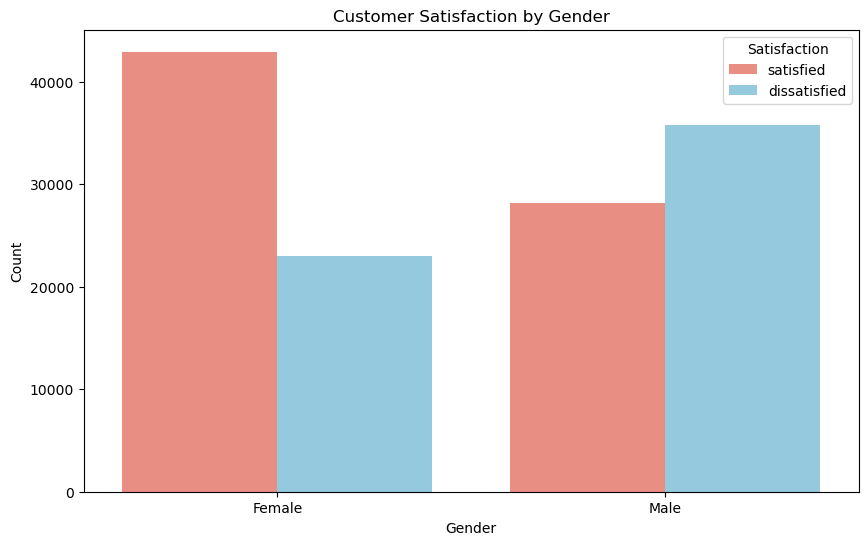

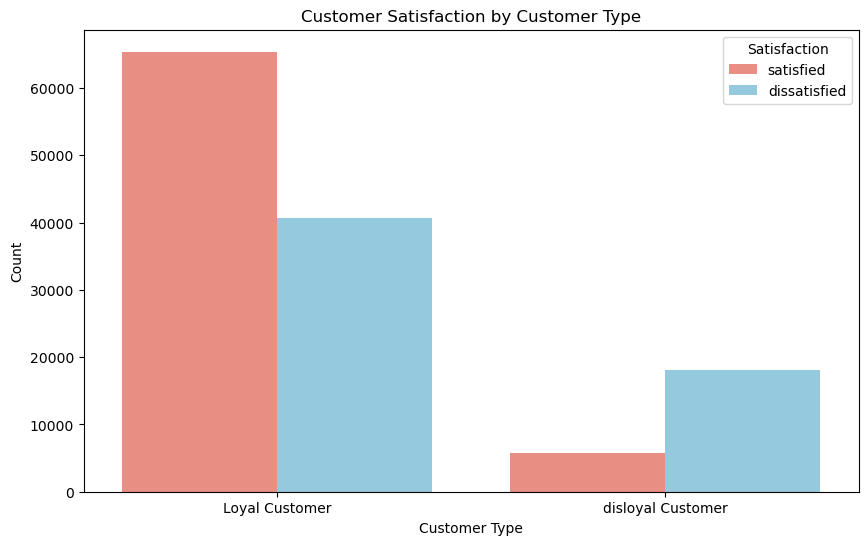

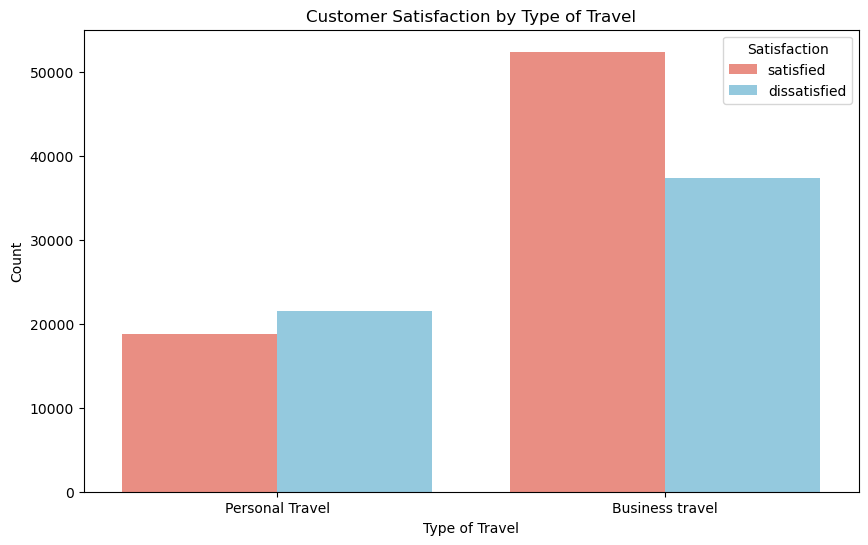

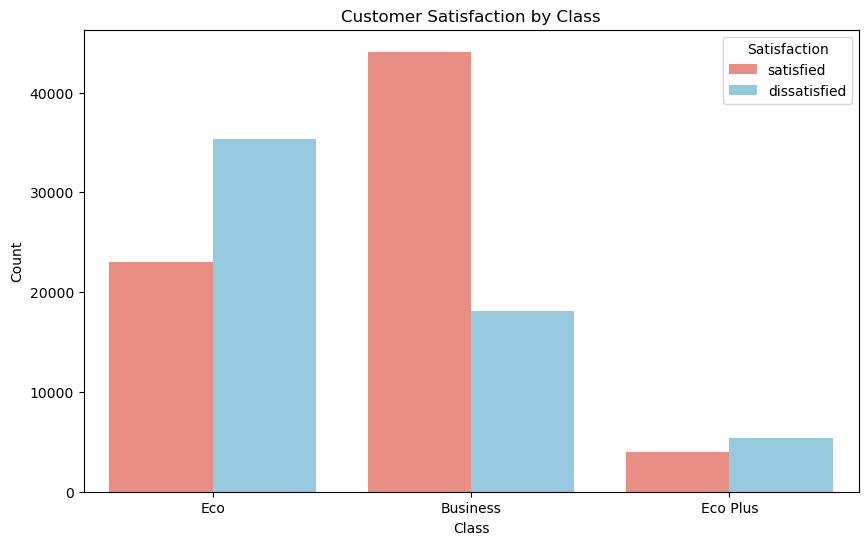

In [21]:
# Iterate through each categorical column
for col in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='satisfaction', palette=['salmon', 'skyblue'])
    
    # Setting the title, labels, and legend for a plot depicting customer satisfaction by a specific feature
    plt.title('Customer Satisfaction by {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Satisfaction', loc='upper right')
    
    # Display the plot
    plt.show()

These visuals highlight several significant trends: firstly, women tend to exhibit higher levels of satisfaction compared to men. Secondly, customers in the 'Business' travel category generally report higher satisfaction levels than those in 'Eco' and 'Eco Plus.' This discrepancy likely arises from the enhanced and more comfortable services typically associated with 'Business' class.

Additionally, the data indicates that 'Business' travelers are consistently more satisfied than 'Personal' travelers, who exhibit a nearly equal ratio of satisfied to dissatisfied customers. Lastly, 'loyal' customers tend to express higher satisfaction levels, while 'disloyal' customers are predominantly dissatisfied.

Our current focus is to uncover the reasons behind the greater satisfaction of 'Business' travelers and the recurring dissatisfaction among 'disloyal' customers. Could the presence or absence of specific features, such as 'Inflight entertainment,' play a role in these patterns?

C:\Users\Yashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


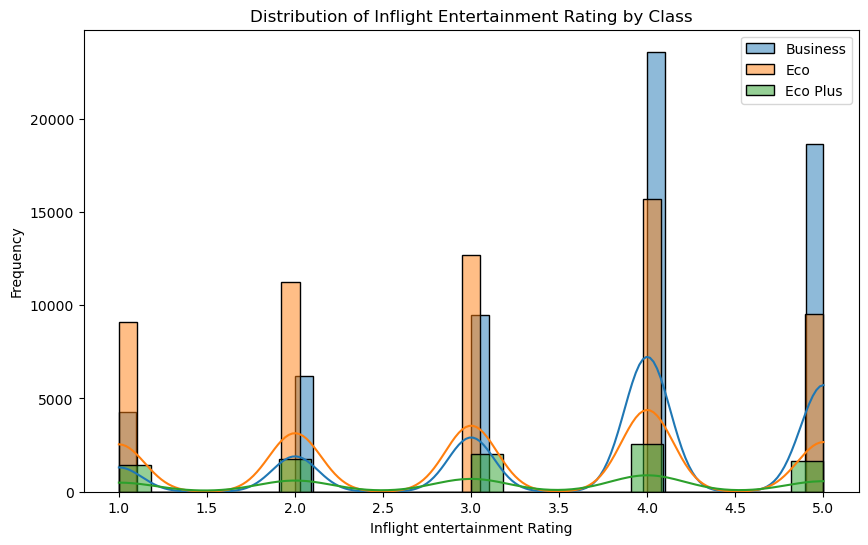

In [22]:
plt.figure(figsize=(10, 6))

# Plotting histograms 'Inflight entertainment' ratings by different classes
sns.histplot(df[df['Class'] == 'Business']['Inflight entertainment'], label='Business', kde=True)
sns.histplot(df[df['Class'] == 'Eco']['Inflight entertainment'], label='Eco', kde=True)
sns.histplot(df[df['Class'] == 'Eco Plus']['Inflight entertainment'], label='Eco Plus', kde=True)

# Setting the x-axis label, y-axis label, plot title, and adding a legend
plt.xlabel('Inflight entertainment Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Inflight Entertainment Rating by Class')
plt.legend()

# Displaying the plot
plt.show()

This graph illustrates a clear trend: 'Eco' and 'Eco Plus' passengers tend to provide lower ratings for 'Inflight entertainment,' while 'Business' passengers consistently rate it higher. This observation aligns with our previous finding that customers who assign ratings of 5 or 4 to 'Inflight entertainment' are generally satisfied.

The reason for the heightened satisfaction among 'Business' passengers becomes apparent: they enjoy more extensive 'Inflight entertainment' services compared to 'Eco' and 'Eco Plus' passengers. This difference in available entertainment options emerges as a likely explanation for the varying levels of satisfaction.

In conclusion we recommend to:

     1.Enhance Inflight Entertainment in Economy Classes: To improve customer satisfaction in 'Eco' and 'Eco Plus,' consider enhancing the Inflight entertainment offerings in these classes to align them more closely with the higher-rated 'Business' class.

     2.Highlight Inflight Entertainment as a Feature: In marketing and service promotions, emphasize the availability and quality of Inflight entertainment, especially in 'Business' class, to attract and retain customers who value this feature.

C:\Users\Yashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


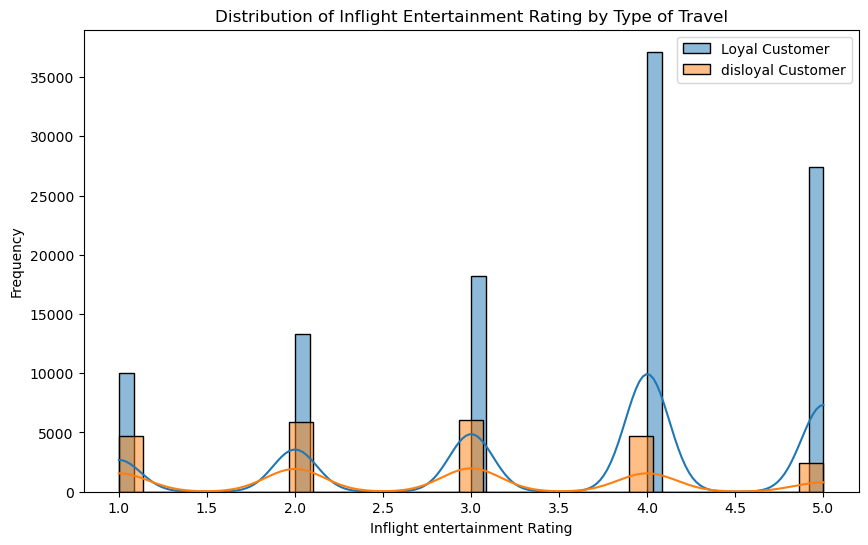

In [24]:
plt.figure(figsize=(10, 6))

# Plotting histograms 'Inflight entertainment' ratings by different Customer Type
sns.histplot(df[df['Customer Type'] == 'Loyal Customer']['Inflight entertainment'], label='Loyal Customer', kde=True)
sns.histplot(df[df['Customer Type'] == 'disloyal Customer']['Inflight entertainment'], label='disloyal Customer', kde=True)

# Setting the x-axis label, y-axis label, plot title, and adding a legend
plt.xlabel('Inflight entertainment Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Inflight Entertainment Rating by Type of Travel')
plt.legend()

# Displaying the plot
plt.show()

This graph also underscores the significance of 'Inflight Entertainment' in shaping customer satisfaction levels. 'Disloyal' customers tend to provide lower ratings, compared to 'loyal' customers. This underscores why 'disloyal' customers often express dissatisfaction and highlights the crucial role of investing in and enhancing this feature.

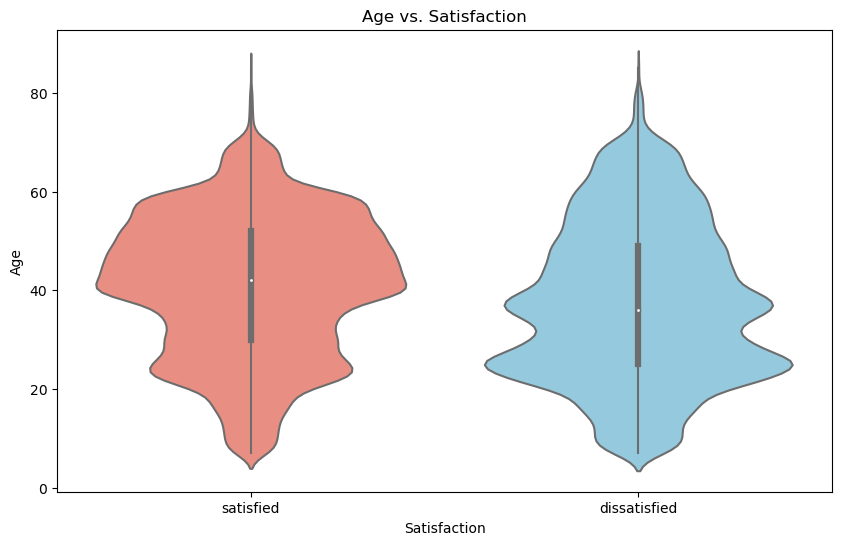

In [25]:
plt.figure(figsize=(10, 6))

# Create a violin plot
sns.violinplot(x='satisfaction', y='Age', data=df, palette=['salmon', 'skyblue'])

# Add labels and title
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.title('Age vs. Satisfaction')

# Show the plot
plt.show()

The plot of the violin clearly demonstrates a marked variance in the age distribution between satisfied and dissatisfied individuals. It reveals that satisfied individuals generally show a higher life expectancy (from about 40 to 60) than their dissatisfied counterparts(ranging from 20 to 40). This observation points to a possible influence of age on levels of satisfaction, as older individuals tend to express greater satisfaction.

One plausible explanation for this trend is that younger individuals often have more specific and demanding expectations, which makes meeting their satisfaction standards relatively more difficult.

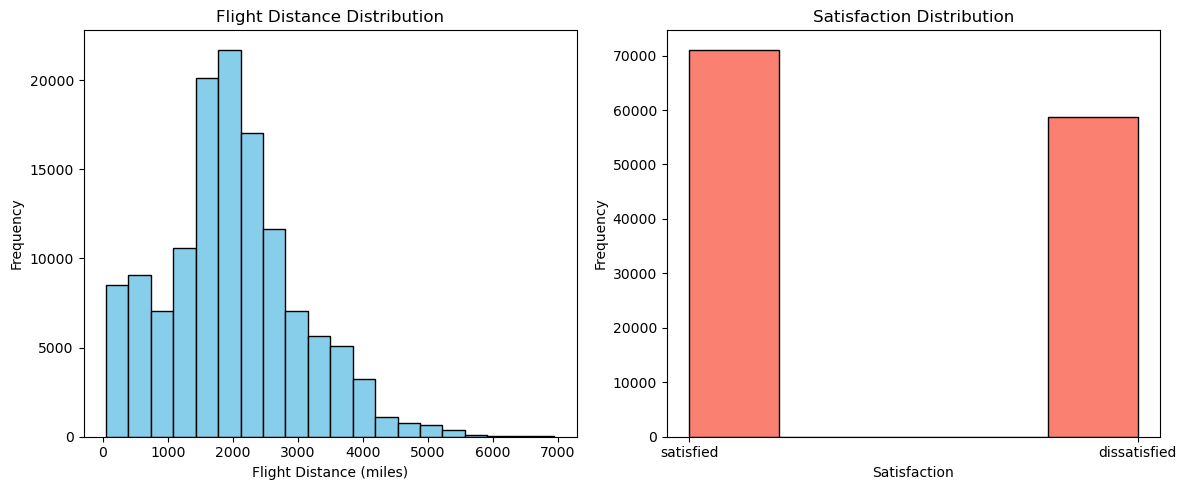

In [26]:
# Creating a side-by-side histogram subplot for Flight Distance and Satisfaction distribution
plt.figure(figsize=(12, 5))

# Creating the left subplot
plt.subplot(1, 2, 1)
plt.hist(df['Flight Distance'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Flight Distance (miles)')
plt.ylabel('Frequency')
plt.title('Flight Distance Distribution')

# Creating the right subplot
plt.subplot(1, 2, 2)
plt.hist(df['satisfaction'], bins=5, color='salmon', edgecolor='black')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.title('Satisfaction Distribution')

# Ensuring proper spacing and layout between subplots
plt.tight_layout()

# Displaying the combined subplots
plt.show()


The preceding graphs reveal that the highest flight distances generally fall within the range of approximately 1500 to 2200 miles.

The dissatisfied customers tend to have a higher density around the mean value, while the density of the remaining distances is relatively low. In contrast, satisfied customers generally have a more evenly distributed density, with a slight increase around the mean.

While there are a few outliers, overall, customer satisfaction does not appear to be significantly influenced by flight distance.

## Data Preprocessing

In [27]:
# Split data into x and y.
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

In [28]:
# One hot Endocing .
X = pd.get_dummies(X, columns=['Class'])

# Label Encoding.
label_encoder = LabelEncoder()
for i in ['Gender', 'Customer Type', 'Type of Travel']:
    X[i] = label_encoder.fit_transform(X[i])

In [29]:
# Select the features you want to scale
selected_features = X[["Age", "Flight Distance", "Departure Delay in Minutes"]]

# Create a scaler object.
scaler = StandardScaler()

# Fit scaler on the selected features.
scaler.fit(selected_features)

# Transform the selected features with the scaler.
selected_features_scaled = scaler.transform(selected_features)

# Replace the original columns with the scaled values in the DataFrame
X[["Age", "Flight Distance", "Departure Delay in Minutes"]] = selected_features_scaled

X.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,0,0,1.691351,1,-1.671103,1,1,1,2,2,...,3,1,3,5,3,2,-0.386481,False,True,False
1,1,0,0.500820,1,0.469852,1,1,1,3,1,...,4,4,4,2,3,2,7.756204,True,False,False
2,0,0,-1.615680,1,0.152458,1,1,1,3,2,...,3,3,4,4,4,2,-0.386481,False,True,False
3,0,0,1.360648,1,-1.322552,1,1,1,3,3,...,1,1,1,4,1,3,-0.386481,False,True,False
4,0,0,2.022054,1,-1.584452,1,1,1,3,4,...,2,1,2,4,2,5,-0.386481,False,True,False


## Modeling

In [30]:
# Define a list of models to evaluate
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

In [31]:
# Split train data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over each model and evaluate its accuracy using cross-validation.
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Print the mean accuracy score for the current model
    print(f"{model.__class__.__name__}: Mean Accuracy = {scores.mean()}")

LogisticRegression: Mean Accuracy = 0.8395441831883617
DecisionTreeClassifier: Mean Accuracy = 0.9215429689119203
RandomForestClassifier: Mean Accuracy = 0.9465468076983589


After evaluating multiple classification models, we found that the Random Forest algorithm demonstrated the best performance based on the mean accuracy metric. Therefore, we selected the Random Forest model to make predictions on our test data.

In [32]:
# Make tha random forest model with specific best hyperparameters.
model = RandomForestClassifier()

# Fit the model.
model.fit(X_train, y_train)

# Predict y-predict.
y_pred = model.predict(X_test)

# Evaluate the accuracy of y-predict.
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.950


### Feature Importance

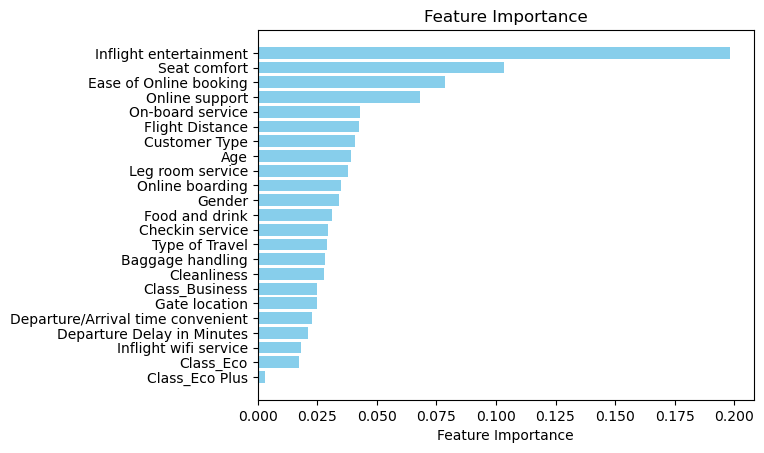

In [33]:
# Get feature importances
feature_importance = model.feature_importances_

# Sort feature importance indices
sorted_idx = np.argsort(feature_importance)

# Retrieve feature names
features = X.columns

# Plot feature importance
plt.figure()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

Conclusion 
         
         In conclusion, this notebook provides valuable insights into customer satisfaction in the airline industry. Factors such as inflight entertainment, seat comfort, ease of online booking, and online support have a significant impact on satisfaction levels.
         Based on the analysis, we recommend focusing on improving these areas to enhance customer experiences and increase satisfaction. Additionally, addressing departure delays and ensuring prompt and reliable services can help mitigate dissatisfaction.
         
         The random forest classifier model demonstrated good performance, indicating its potential for predicting customer satisfaction. Further refinement and evaluation of the model on additional datasets can enhance its accuracy and reliability.By implementing these suggestions and leveraging the findings from this analysis, airlines can optimize customer satisfaction, foster loyalty, and ultimately drive business success.
